In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm

In [241]:

df_data=pd.read_table('genetic_data.txt',sep=" ",skiprows=6)
print(df_data)


        Generation         x         y       f(x,y)       fitness
0                0  0.596871  1.462230   122.481000  1.000000e-39
1                0  1.125330  1.932350    44.370400  5.372710e-20
2                0  0.603688  1.218570    73.111300  1.770710e-32
3                0  1.414720  1.142860    73.888500  8.139740e-33
4                0  0.059725  1.637590   267.887000  1.000000e-39
5                0  1.588840  0.812680   293.348000  1.000000e-39
6                0  1.366580  0.461194   197.917000  1.000000e-39
7                0  1.541790  0.400454   391.011000  1.000000e-39
8                0  0.278625  0.053809     0.577136  5.615040e-01
9                0  1.340740  1.219920    33.484700  2.869330e-15
10               0  1.778610  0.877454   523.185000  1.000000e-39
11               0  0.482597  0.027162     4.500510  1.110330e-02
12               0  0.177949  1.194460   135.885000  1.000000e-39
13               0  0.150176  0.300274     8.435130  2.171050e-04
14        

/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [242]:
#split in Generations
generations=[]
count=0
before=0
tmp_list=[]
for i,gen in enumerate(df_data["Generation"]):
    if gen!=count:
        generations.append(df_data.iloc[before:i-1,:])
        before=i-1
        count+=1
print(generations[99]['fitness'].max())

0.999991


In [243]:
#find fittest per Generation
fitest=[]
best_sol_x=[]
best_sol_y=[]
for i,gen in enumerate(generations):
    fitest.append(generations[i]['fitness'].max())
    for j,ele in enumerate(generations[i]['fitness']):
        if (generations[i]['fitness'].iloc[j]==fitest[i]):
            best_sol_x.append(generations[i]['x'].iloc[j])
            best_sol_y.append(generations[i]['y'].iloc[j])

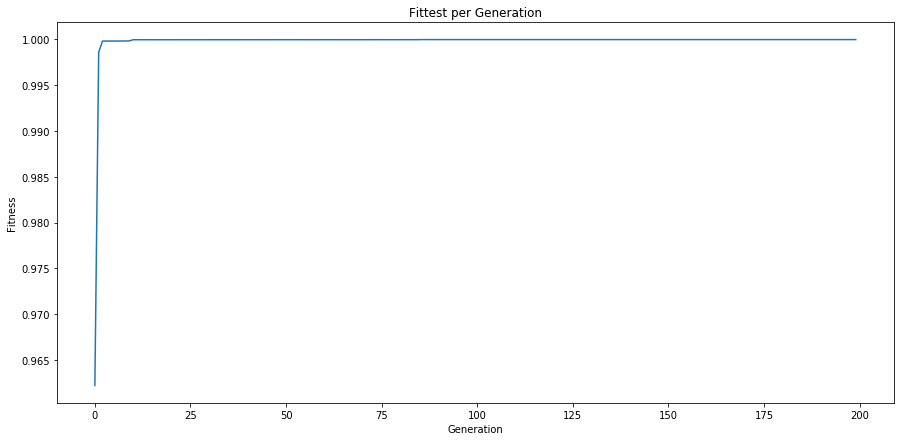

In [244]:
plt.figure(figsize=(15,7))
plt.plot(fitest)
#plt.yscale('log')
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.title('Fittest per Generation')
plt.savefig('Fittest.png')

In [245]:
def f(x,y):
    return 100*x**4-200*x**2*y+100*y**2+x**2-2*x+1

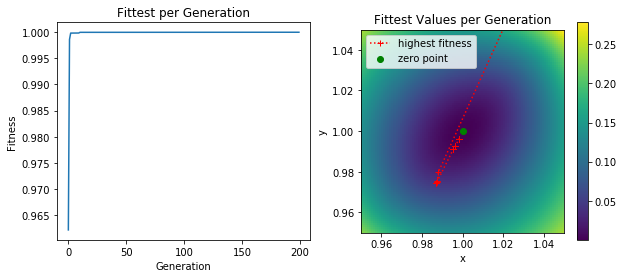

In [251]:
#3D plot, best solution per Generation
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(122)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Fittest Values per Generation')
ax.plot(best_sol_x,best_sol_y,c='r',marker='+',label='highest fitness',linestyle=':')
ry = np.linspace(0.95,1.05,100)
rx = np.linspace(0.95,1.05,100)
x,y  = np.meshgrid(rx,ry)
ax.scatter(1,1,c='g',marker='o',label='zero point')
#ax.plot(x,y,f(x,y))
#ax.contour3D(x,y,f(x,y),50) 
#plt.contourf(x,y,f(x,y),50)
rz=f(rx,ry)
rbf = scipy.interpolate.Rbf(rx, ry, rz, function='multiquadric')
z=rbf(x,y)
plt.imshow(z, vmin=rz.min(), vmax=rz.max(), origin='lower', 
           extent=[rx.min(), rx.max(), ry.min(), ry.max()])
plt.colorbar()
plt.legend()
bx=plt.subplot(121)
bx.plot(fitest)
bx.set_ylabel('Fitness')
bx.set_xlabel('Generation')
bx.set_title('Fittest per Generation')
#extent=[rx.min(), rx.max(), ry.min(), ry.max()])
plt.savefig('Graph.png')

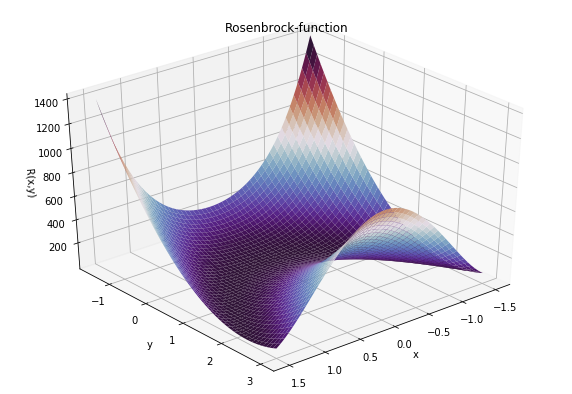

In [184]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('R(x,y)')
ax.set_title('Rosenbrock-function')

ry = np.linspace(-1.5,3,1000)
rx = np.linspace(-1.5,1.5,1000)
rz=f(rx,ry)
X,Y  = np.meshgrid(rx,ry)

rbf = scipy.interpolate.Rbf(rx, ry, rz, function='multiquadric')
Z=f(X,Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.twilight_shifted,
                       linewidth=0, antialiased=True)
ax.view_init(elev=35., azim=50)
plt.savefig('Rosen.png')
plt.show()
